# Recommender System

MSDS_696 Data Science Practicum II

Corrie Meyersick

August 2019

## Project Purpose

The purpose of this project is to take a dataset provided by the UCI Machine Learning repository and create a recommender system. 

## The Data

The Online Retail dataset was retrieved from the UCI Machine Learning repository and contains transactions that occurred between 01/12/2010 and 09/12/2011 for an online retailer based in the UK. 
The dataset can be retrieved from: https://archive.ics.uci.edu/ml/datasets/online+retail

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  
%matplotlib inline
from datetime import date
from datetime import time
from datetime import datetime

In [2]:
#import dataset and view the first few rows
retail = pd.read_excel('/Users/corrie/MSDS_696 Data Science Practicum II/Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Cleanup

The info command is used to determine the different columns and data types within the dataframe.

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


The majority of the columns are object, int64, and float 64. 
The InvoiceDate is shown as an object. For analysis purposes this will be changed to the DateTime type. 

The info command also shows where the non-null fields are. From this output it can be determined that the majoirty of the missing values are within the CustomerID field. Because the information on the items is still important regardless on if there is not a customer number, the null values in the customer ID field should be replaced with an equivelent.

Since the Customer ID is not needed for calculations, this is changed to an object rather than float64

In [274]:
retail['CustomerID'] = retail['CustomerID'].astype(str)
retail.info()
print(np.shape(retail))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 13 columns):
InvoiceNo        541909 non-null object
StockCode        541909 non-null object
Description      541909 non-null object
Quantity         541909 non-null int64
InvoiceDate      541909 non-null datetime64[ns]
UnitPrice        541909 non-null float64
CustomerID       541909 non-null object
Country          541909 non-null object
Year-Month       541909 non-null object
Year             541909 non-null int64
Month            541909 non-null int64
LineItemTotal    541909 non-null float64
Returned         541909 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 53.7+ MB
(541909, 13)


### Missing Values

In [14]:
# Missing Customer ID values need to be replaced
#replace nan values in the Customer ID column with "unknown"
retail['CustomerID']=retail['CustomerID'].apply(lambda x: x.replace('nan','Unknown'))

In [16]:
print(retail['CustomerID'].sort_values(ascending=True))

61624     12346.0
61619     12346.0
148289    12347.0
535009    12347.0
535008    12347.0
535007    12347.0
535006    12347.0
535005    12347.0
535004    12347.0
72246     12347.0
72247     12347.0
72248     12347.0
72249     12347.0
72250     12347.0
72251     12347.0
72252     12347.0
72253     12347.0
72254     12347.0
72268     12347.0
72267     12347.0
72266     12347.0
286640    12347.0
72264     12347.0
72263     12347.0
535010    12347.0
72262     12347.0
72260     12347.0
72259     12347.0
72258     12347.0
72257     12347.0
           ...   
112704    Unknown
112710    Unknown
112703    Unknown
112701    Unknown
112700    Unknown
112699    Unknown
112698    Unknown
112697    Unknown
112696    Unknown
112702    Unknown
112711    Unknown
112712    Unknown
112713    Unknown
112728    Unknown
112727    Unknown
112726    Unknown
112725    Unknown
112724    Unknown
112723    Unknown
112722    Unknown
112721    Unknown
112720    Unknown
112719    Unknown
112718    Unknown
112717    

In [17]:
#determine how many additional null values need to be addressed
np.count_nonzero(retail.isnull())

1454

In [18]:
#view the info to see which columns still have null values
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     541909 non-null object
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


The description field is still showing null values. Because it is the description of the item it does not make sense to backfill, forward fill, or use the mean to replace the null values. 

In order to still be able to perform analysis on the unknown items, it is decided to update the null values in this column to say "Unknown"

In [19]:
#change type on the description column. Otherwise errors will be received
retail['Description'] = retail['Description'].astype(str)

#replace null values in the description field with "unknown"
retail['Description']=retail['Description'].apply(lambda x: x.replace('NaN','Unknown'))

#check/verify null values have been addressed
np.count_nonzero(retail.isnull())

0

### Additional Formatting Changes

For additional data analysis purposes, the following is used for data type changes and formatting.

In [20]:
#Change InvoiceDate to datetime format
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

#Create new column for Year-Month, Year, and Month from the invoice date
retail['Year-Month'] = retail.InvoiceDate.map(lambda x: x.strftime('%Y-%m'))
retail['Year'] = retail['InvoiceDate'].dt.year
retail['Month'] = retail['InvoiceDate'].dt.month

retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12


In [22]:
#change the Year-Month column to datetime format
retail['Year-Month'] = pd.to_datetime(retail['Year-Month'])

#change Year-Month column to only show year and month
retail['Year-Month']=retail['Year-Month'].dt.strftime('%Y-%m')


In [23]:
#view the different keys for the Year-Month column. This shows the range that the dataset is in
retail.groupby(['Year-Month']).groups.keys()

dict_keys(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12'])

### Additional Columns

A new column, LineItemTotal, is created to calculate the price for the total line item on invoices.

Using the Quantity column, we identify items that are returned. A new column is created and if the quantity is less than 0, then the a value of '-1' is added input to indicate that the item was returned

In [25]:
#calculate the line item total based on the quantity and unit price
retail['LineItemTotal'] = retail['Quantity'] * retail['UnitPrice']

#Determine if item is returned
retail.loc[retail.Quantity<0, 'Returned']='-1'
retail.loc[retail.Quantity>=0, 'Returned']='0'

#Change Returned column from Object to int64
retail['Returned']=retail['Returned'].astype('int64')

retail.loc[236:250]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Year,Month,LineItemTotal,Returned
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12,2010,12,-6.96,-1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12,2010,12,-6.96,-1
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12,2010,12,-6.96,-1
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,2010-12,2010,12,-41.40,-1
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12,2010,12,-19.80,-1
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12,2010,12,-39.60,-1
242,536392,22150,3 STRIPEY MICE FELTCRAFT,6,2010-12-01 10:29:00,1.95,13705.0,United Kingdom,2010-12,2010,12,11.70,0
243,536392,22619,SET OF 6 SOLDIER SKITTLES,4,2010-12-01 10:29:00,3.75,13705.0,United Kingdom,2010-12,2010,12,15.00,0
244,536392,21891,TRADITIONAL WOODEN SKIPPING ROPE,12,2010-12-01 10:29:00,1.25,13705.0,United Kingdom,2010-12,2010,12,15.00,0
245,536392,21889,WOODEN BOX OF DOMINOES,12,2010-12-01 10:29:00,1.25,13705.0,United Kingdom,2010-12,2010,12,15.00,0


### Removing Unwanted Items

There are a number of items listed in the dataset that are not needed for the recommender system. Some of these include discounts, fees, postage, and gift cards. 

These items are identified and a new df is created (retail2)

In [27]:
#View quick stats on original df including all items
retail.describe()

,Quantity,UnitPrice,Year,Month,LineItemTotal,Returned
count,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,2010.921609,7.553128,17.987795,-0.019605
std,218.081158,96.759853,0.268787,3.509055,378.810824,0.138638
min,-80995.000000,-11062.060000,2010.000000,1.000000,-168469.600000,-1.000000
25%,1.000000,1.250000,2011.000000,5.000000,3.400000,0.000000
50%,3.000000,2.080000,2011.000000,8.000000,9.750000,0.000000
75%,10.000000,4.130000,2011.000000,11.000000,17.400000,0.000000
max,80995.000000,38970.000000,2011.000000,12.000000,168469.600000,0.000000


In [42]:
#create dataframe without discounts/adjustments/non-item recommendations
#show different stock codes: 'S','POST','PADS','M','gift_0001_50','gift_0001_40',
    #'gift_0001_30','gift_0001_20','gift_0001_10','DOT','D','BANK CHARGES',
    #'B','AMAZONFEE',''

MiscItems = ['S','POST','PADS','M','gift_0001_50','gift_0001_40',
    'gift_0001_30','gift_0001_20','gift_0001_10','DOT','D','BANK CHARGES',
    'B','AMAZONFEE','CRUK']
retail2 = retail[~retail['StockCode'].isin(MiscItems)]
retail2.loc[2240:2250]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Year,Month,LineItemTotal,Returned
2240,536569,21340,CLASSIC METAL BIRDCAGE PLANT HOLDER,1,2010-12-01 15:35:00,12.75,16274.0,United Kingdom,2010-12,2010,12,12.75,0
2241,536569,22816,CARD MOTORBIKE SANTA,12,2010-12-01 15:35:00,0.42,16274.0,United Kingdom,2010-12,2010,12,5.04,0
2242,536569,22818,CARD CHRISTMAS VILLAGE,12,2010-12-01 15:35:00,0.42,16274.0,United Kingdom,2010-12,2010,12,5.04,0
2243,536569,21591,COSY HOUR CIGAR BOX MATCHES,2,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,2010-12,2010,12,2.50,0
2244,536569,21587,COSY HOUR GIANT TUBE MATCHES,3,2010-12-01 15:35:00,2.55,16274.0,United Kingdom,2010-12,2010,12,7.65,0
2245,536569,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-01 15:35:00,3.75,16274.0,United Kingdom,2010-12,2010,12,3.75,0
2246,536569,22767,TRIPLE PHOTO FRAME CORNICE,1,2010-12-01 15:35:00,9.95,16274.0,United Kingdom,2010-12,2010,12,9.95,0
2247,536569,22660,DOORMAT I LOVE LONDON,1,2010-12-01 15:35:00,7.95,16274.0,United Kingdom,2010-12,2010,12,7.95,0
2248,536569,85232B,SET OF 3 BABUSHKA STACKING TINS,1,2010-12-01 15:35:00,4.95,16274.0,United Kingdom,2010-12,2010,12,4.95,0
2249,536569,22941,CHRISTMAS LIGHTS 10 REINDEER,1,2010-12-01 15:35:00,8.50,16274.0,United Kingdom,2010-12,2010,12,8.50,0


In [48]:
#view stats on new df after misc items are removed
#note that 2,789 items were removed

retail2.describe()

,Quantity,UnitPrice,Year,Month,LineItemTotal,Returned
count,539104.000000,539104.000000,539104.000000,539104.000000,539104.000000,539104.000000
mean,9.583361,3.281144,2010.921542,7.555950,18.177749,-0.018627
std,218.593513,4.557692,0.268891,3.509149,367.049461,0.135205
min,-80995.000000,0.000000,2010.000000,1.000000,-168469.600000,-1.000000
25%,1.000000,1.250000,2011.000000,5.000000,3.400000,0.000000
50%,3.000000,2.080000,2011.000000,8.000000,9.360000,0.000000
75%,10.000000,4.130000,2011.000000,11.000000,17.400000,0.000000
max,80995.000000,649.500000,2011.000000,12.000000,168469.600000,0.000000


## Exploratory Data Analysis

In [44]:
#determine the total, min and max for each year-month based on unit Price
totals = retail2.groupby(['Year-Month']).agg({'UnitPrice':[sum,min,max]})
totals.columns = ["_".join(x) for x in totals.columns.ravel()]
totals

,UnitPrice_sum,UnitPrice_min,UnitPrice_max
Year-Month,,,
2010-12,161372.99,0.0,295.00
2011-01,117436.50,0.0,295.00
2011-02,97768.80,0.0,295.00
2011-03,126674.88,0.0,295.00
2011-04,98589.72,0.0,295.00
2011-05,127358.38,0.0,295.00
2011-06,124721.95,0.0,649.50
2011-07,119367.51,0.0,125.00
2011-08,111185.25,0.0,165.00


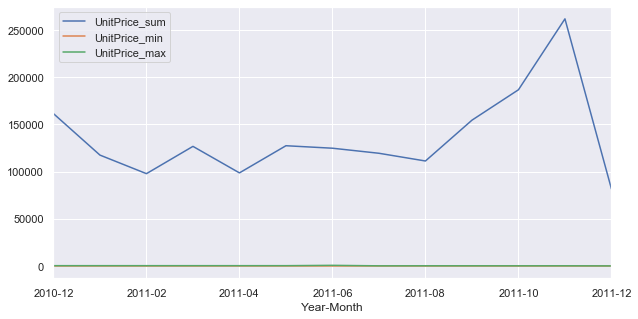

In [45]:
totals.plot(figsize=(10,5))

In [46]:
print(retail2['UnitPrice'].sort_values(ascending=True))

175520      0.0
140196      0.0
140197      0.0
140198      0.0
140199      0.0
193566      0.0
140200      0.0
140201      0.0
140202      0.0
140211      0.0
193565      0.0
193564      0.0
193563      0.0
193562      0.0
193560      0.0
193559      0.0
193558      0.0
193557      0.0
193556      0.0
193555      0.0
140281      0.0
140282      0.0
140283      0.0
140284      0.0
140285      0.0
140286      0.0
193554      0.0
193553      0.0
140194      0.0
140353      0.0
          ...  
443596    165.0
246       165.0
100580    165.0
33105     175.0
25168     175.0
114795    195.0
182648    195.0
194248    195.0
183128    195.0
214674    195.0
156737    195.0
191600    195.0
110843    195.0
220298    195.0
112775    195.0
156999    195.0
166111    195.0
51674     265.5
133994    295.0
205759    295.0
4989      295.0
87141     295.0
171178    295.0
32484     295.0
118769    295.0
82768     295.0
51636     295.0
36165     295.0
222680    649.5
222682    649.5
Name: UnitPrice, Length:

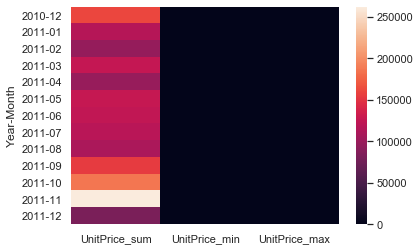

In [47]:
#view heatmap of the totals by month to see which have a higher volume
sns.heatmap(totals)

In [49]:
#using the line item total
#determine the total, min and max for each year-month
linetotals = retail2.groupby(['Year-Month']).agg({'LineItemTotal':[sum,min,max]})
linetotals.columns = ["_".join(x) for x in linetotals.columns.ravel()]
linetotals

,LineItemTotal_sum,LineItemTotal_min,LineItemTotal_max
Year-Month,,,
2010-12,760926.46,-1275.00,3828.00
2011-01,580556.89,-77183.60,77183.60
2011-02,500725.33,-1224.00,3215.52
2011-03,681332.31,-525.60,2076.80
2011-04,483301.21,-6539.40,6539.40
2011-05,732680.18,-442.00,3160.08
2011-06,725526.03,-1155.00,38970.00
2011-07,678505.20,-990.00,3129.60
2011-08,702983.98,-2432.70,4176.00


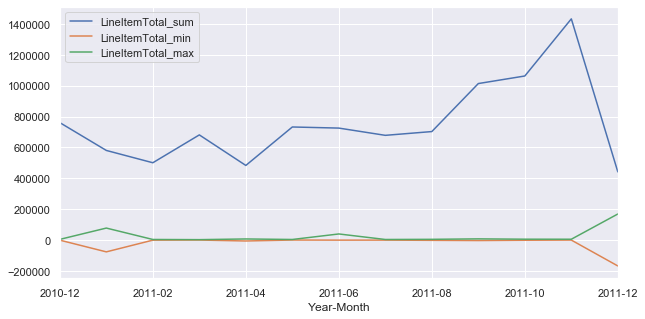

In [50]:
linetotals.plot(figsize=(10,5))

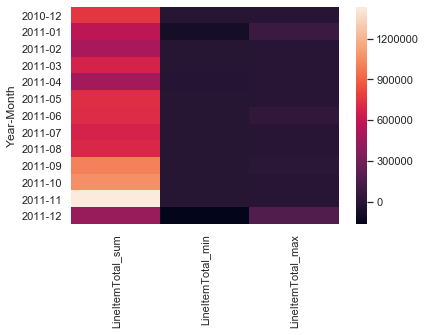

In [51]:
sns.heatmap(linetotals)

### Returns vs. Purchases

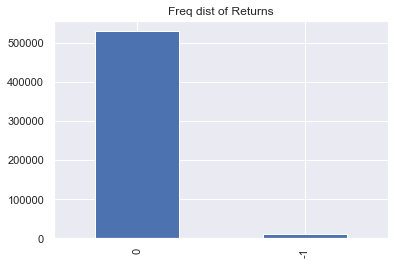

In [52]:
#compare the number of purchases and returns
retail2['Returned'].value_counts().plot.bar(title="Freq dist of Returns")

### Correlation

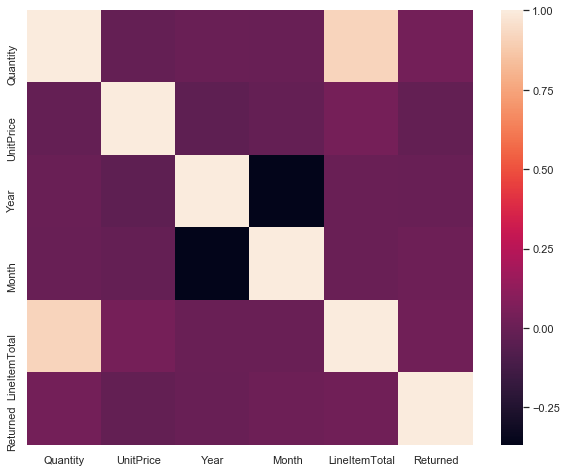

In [53]:
f, ax = plt.subplots(figsize=(10,8))
corr = retail2.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

Above we can see the correlation network for variables that have numeric values. Highly correlated variables would have a correlation value close to +1 and less correlated variables would have a correlation value close to -1. Based on the matrix we can see that there are not any variables are highly correlated other than LineItemTotal and Quantity.

The following pivot table is created based on country, customer and customer ID to show the quantity and unit price totals

In [259]:
retail_pivot = pd.pivot_table(retail2, index=['Country','CustomerID'],
                             values=['Quantity','UnitPrice'],
                              aggfunc=[np.sum])
print(retail_pivot)

                               sum           
                          Quantity  UnitPrice
Country        CustomerID                    
Australia      12386.0         354      23.91
               12388.0        1462     277.77
               12393.0         816     145.90
               12415.0       77242    1887.09
               12422.0         195      51.12
               12424.0         740      83.42
               12431.0        2393     718.08
               12434.0         373     198.13
               16321.0          78      56.60
Austria        12358.0         242      77.21
               12360.0        1156     337.91
               12370.0          48      24.70
               12373.0         196      24.15
               12374.0         339      99.25
               12414.0         297      34.26
               12429.0         196      86.33
               12453.0         473     102.91
               12817.0          52       8.29
               12818.0         914

The following pivot shows the sum for each month

In [260]:
retail_pivot3 = pd.pivot_table(retail2, index=['Year-Month'],
                             values=['LineItemTotal'],aggfunc=[np.sum])
retail_pivot3

,sum
,LineItemTotal
Year-Month,
2010-12,760926.46
2011-01,580556.89
2011-02,500725.33
2011-03,681332.31
2011-04,483301.21
2011-05,732680.18
2011-06,725526.03
2011-07,678505.20


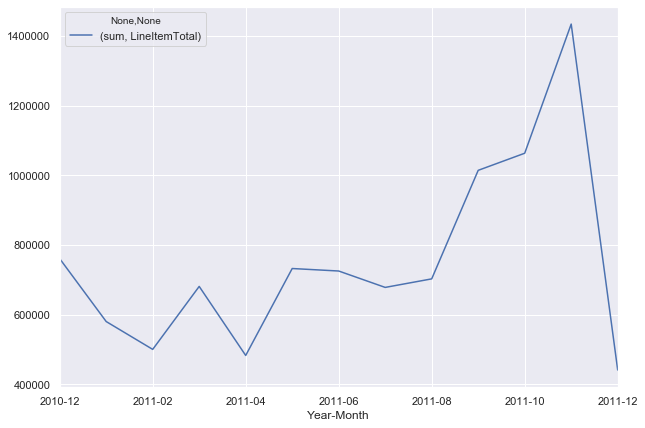

In [261]:
retail_pivot3.plot(figsize = (10,7))

The following is a heatmap based on the sum of the line item totals for each month. This is using the pivot table created from the dataset that contains the misc. items

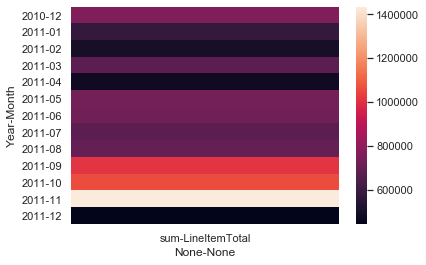

In [262]:
sns.heatmap(retail_pivot3)

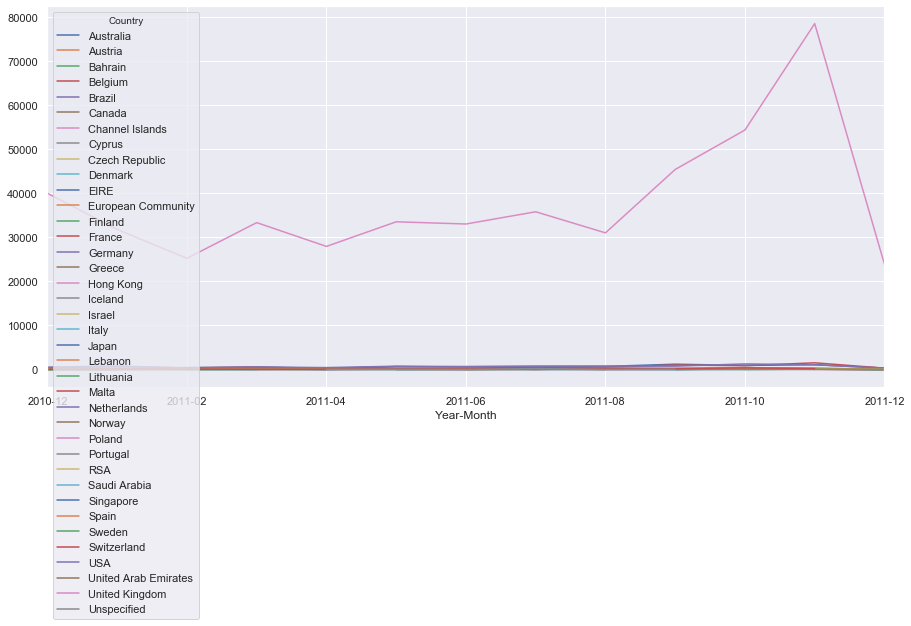

In [263]:
fig,ax = plt.subplots(figsize=(15,7))
retail2.groupby(['Year-Month','Country']).count()['CustomerID'].unstack().plot(ax=ax)

The previous plot shows that the UK has a significantly higher volume of orders over the other countries. This does make it harder to read the data on other countries.

In [264]:
#count of customer id's grouped by country
retail2.groupby(['Country']).count()['CustomerID']

Country
Australia                 1257
Austria                    387
Bahrain                     19
Belgium                   1971
Brazil                      32
Canada                     150
Channel Islands            756
Cyprus                     619
Czech Republic              28
Denmark                    375
EIRE                      8183
European Community          58
Finland                    653
France                    8236
Germany                   9096
Greece                     142
Hong Kong                  280
Iceland                    182
Israel                     297
Italy                      783
Japan                      355
Lebanon                     45
Lithuania                   35
Malta                      123
Netherlands               2330
Norway                    1060
Poland                     336
Portugal                  1475
RSA                         57
Saudi Arabia                10
Singapore                  215
Spain                     2468


The previous group by shows that other than the UK, which has 495,478 instances, the countries with the highest number of orders is EIRE, Germany and France.

In order to narrow down the dataset to determine the next market to focus on, a new DF for the next top countries is created

In [265]:
countries = ['EIRE','Germany','France']
top_retail=retail2[retail2.Country.isin(countries)]
top_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25515 entries, 26 to 541908
Data columns (total 13 columns):
InvoiceNo        25515 non-null object
StockCode        25515 non-null object
Description      25515 non-null object
Quantity         25515 non-null int64
InvoiceDate      25515 non-null datetime64[ns]
UnitPrice        25515 non-null float64
CustomerID       25515 non-null object
Country          25515 non-null object
Year-Month       25515 non-null object
Year             25515 non-null int64
Month            25515 non-null int64
LineItemTotal    25515 non-null float64
Returned         25515 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 2.7+ MB


The following shows the number of orders each month by different customer IDs for each country

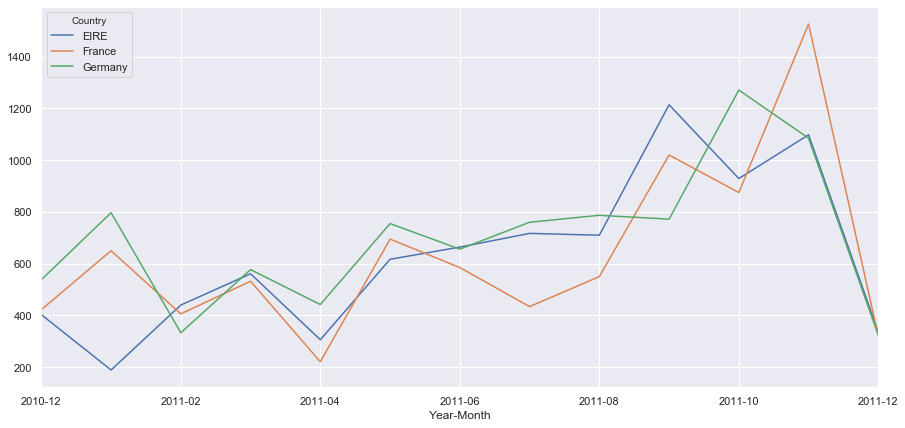

In [266]:
fig,ax = plt.subplots(figsize=(15,7))
top_retail.groupby(['Year-Month','Country']).count()['CustomerID'].unstack().plot(ax=ax)

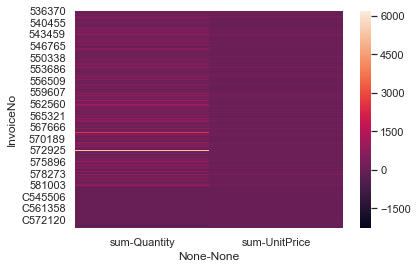

In [267]:
retail_pivot5 = pd.pivot_table(top_retail, index=['InvoiceNo'],
                             values=['Quantity','UnitPrice'],
                               aggfunc=[np.sum])
sns.heatmap(retail_pivot5)

The following heat map is created to show the difference betwen the different countries

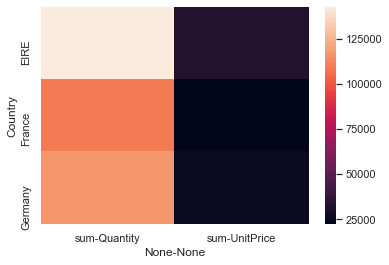

In [268]:
retail_pivot6 = pd.pivot_table(top_retail, index=['Country'],
                             values=['Quantity','UnitPrice'],
                               aggfunc=[np.sum])
sns.heatmap(retail_pivot6)

In [269]:
#df of the top retail countries grouped by invoice no, 
#country and year with the total of line item

top_retail_total = pd.DataFrame(top_retail.groupby(
    ['InvoiceNo','Country','Year-Month'])['LineItemTotal'].sum())
print(top_retail_total)

                              LineItemTotal
InvoiceNo Country Year-Month               
536370    France  2010-12            801.86
536527    Germany 2010-12            243.48
536540    EIRE    2010-12            540.38
536541    EIRE    2010-12             15.00
536803    EIRE    2010-12             22.50
536840    Germany 2010-12            137.35
536852    France  2010-12             71.14
536861    Germany 2010-12            249.50
536885    EIRE    2010-12            549.00
536890    EIRE    2010-12            322.20
536967    Germany 2010-12             58.50
536974    France  2010-12            300.24
536975    EIRE    2010-12           1705.65
536983    Germany 2010-12            157.53
537065    France  2010-12           1364.92
537197    Germany 2010-12            232.50
537198    Germany 2010-12             67.50
537201    Germany 2010-12           1523.30
537212    Germany 2010-12            401.39
537250    Germany 2010-12            178.44
537368    EIRE    2010-12       

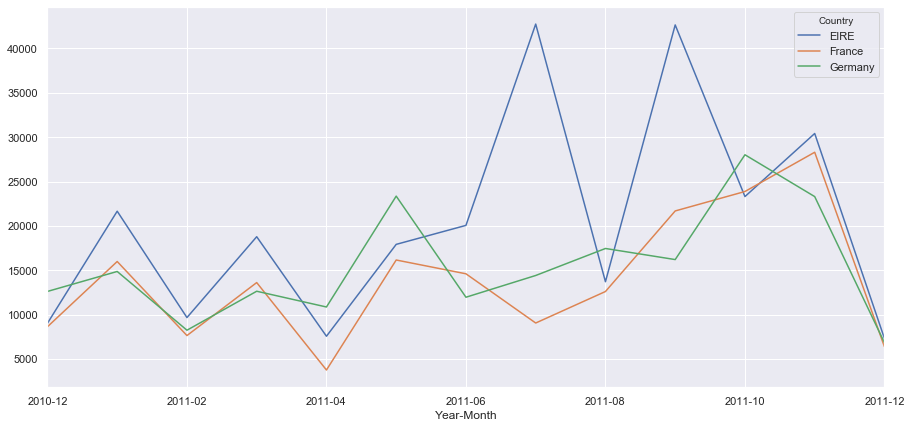

In [270]:
fig,ax = plt.subplots(figsize=(15,7))
top_retail_total.groupby(
    ['Year-Month','Country']).sum()['LineItemTotal'].unstack().plot(ax=ax)

Based on the previous chart, it shows that EIRE is the country with the next highest volume of orders and marketing could either focus on this to bring them to a similar volume as they have in the UK or on the other two countries to bring them up to a similar level as EIRE.

Identify the mean of line item totals and group them by country.

In [271]:
retail2['LineItemTotal'].groupby([retail2['Country']]).mean()

Country
Australia               108.981702
Austria                  22.476279
Bahrain                  28.863158
Belgium                  18.601197
Brazil                   35.737500
Canada                   20.769600
Channel Islands          26.569167
Cyprus                   20.890614
Czech Republic           23.990000
Denmark                  48.112373
EIRE                     32.364470
European Community       19.840517
Finland                  28.029923
France                   22.140528
Germany                  22.076561
Greece                   31.165634
Hong Kong                35.507286
Iceland                  23.681319
Israel                   26.625657
Italy                    19.510013
Japan                    99.774056
Lebanon                  37.641778
Lithuania                47.458857
Malta                    16.101382
Netherlands             121.665039
Norway                   30.465057
Poland                   20.396250
Portugal                 18.217980
RSA         

The previous grouping shows the avg line item total by country. This shows that Australia, Netherlands and Japan have the highest median line item total between all of the countries.

In [91]:
## Export retail2 to excel to load into Tableau
export_excel = retail2.to_excel(r'/Users/corrie/MSDS_696 Data Science Practicum II/Retail2.xlsx',
                               index = None, header = True)


### Order Totals

Determine the countries that spend the most based on the mean of order totals. In order to determine the total cost on each invoice along with the percentage of the order that line item is for, we group by invoice number and sum to line item totals and create new columns for the order total and percentage of order.

In [54]:
order_total = retail2.groupby('InvoiceNo')["LineItemTotal"].sum().rename("Order_Total").reset_index()
#merge the order total into the df
retail_1 = pd.DataFrame(retail2.merge(order_total)) 

#add in value for the quantity of items on an order
order_qty = retail.groupby('InvoiceNo')["Quantity"].sum().rename("Order_Qty").reset_index()
retail_1 = pd.DataFrame(retail_1.merge(order_qty)) #merge the order total into the df

#remove duplicates of the same invoice number
retail_1.drop_duplicates(subset='InvoiceNo',keep="last", inplace=True)

#change order_total to int64
retail_1['Order_Total'] = retail_1['Order_Total'].astype('int64')

retail_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Year,Month,LineItemTotal,Returned,Order_Total,Order_Qty
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12,2010,12,25.50,0,139,40
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12,2010,12,11.10,0,22,12
20,536367,48187,DOORMAT NEW ENGLAND,4,2010-12-01 08:34:00,7.95,13047.0,United Kingdom,2010-12,2010,12,31.80,0,278,83
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,2010-12,2010,12,14.85,0,70,15
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,2010-12,2010,12,17.85,0,17,3


In [55]:
#view count of invoices for each country
retail_1['Country'].value_counts()

United Kingdom          23031
Germany                   578
France                    442
EIRE                      349
Belgium                   117
Spain                     100
Netherlands                97
Switzerland                68
Australia                  67
Portugal                   56
Italy                      49
Finland                    44
Sweden                     42
Norway                     34
Channel Islands            31
Japan                      25
Poland                     24
Denmark                    20
Austria                    19
Cyprus                     17
Unspecified                13
Israel                      9
Malta                       9
Hong Kong                   8
Iceland                     7
USA                         7
Greece                      5
Canada                      5
Singapore                   4
Bahrain                     4
European Community          4
Czech Republic              4
Lithuania                   4
Saudi Arab

The information above tells us where the high volume customer are bsed on the number of orders places. Knowing this can help drive marketing strategies. This information shows that the United Kingdom, Germany, and France are the ones that order the highest volume of items. However, based on previous assessments, even though these are the countries with the highest number or orders placed, they are not the countries that have the highest median cost of their orders.

In [59]:
#view median of invoice total by country
retail_1['Order_Total'].groupby([retail_1['Country']]).mean().sort_values(ascending=False)

Country
Netherlands             2922.030928
Singapore               2279.750000
Australia               2044.253731
Lebanon                 1693.000000
Japan                   1416.680000
Hong Kong               1242.375000
Brazil                  1143.000000
RSA                     1002.000000
Norway                   949.441176
United Arab Emirates     932.000000
Denmark                  901.750000
Greece                   884.600000
Israel                   878.222222
Sweden                   837.238095
Switzerland              771.926471
Cyprus                   760.294118
EIRE                     758.587393
Channel Islands          647.677419
Canada                   622.600000
Iceland                  615.142857
Spain                    517.270000
Portugal                 479.464286
Austria                  457.315789
Finland                  415.659091
Lithuania                415.250000
France                   412.221719
Unspecified              364.923077
United Kingdom      

If we look at the median of the invoice costs, the top countries in price include Netherlands, Singapore, Austrailia, Lebanon, Japan

In [60]:
#view median of invoice total by customer ID
retail_1['Order_Total'].groupby([retail_1['CustomerID']]).mean().sort_values(ascending=False)

CustomerID
15098.0    9904.750000
12357.0    6207.000000
15749.0    5383.500000
12415.0    5151.166667
12688.0    4873.000000
12590.0    4669.500000
12752.0    4366.000000
18102.0    4327.150000
18251.0    4314.000000
16000.0    4131.000000
12378.0    4008.000000
12435.0    3914.000000
17450.0    3871.755102
15195.0    3861.000000
14646.0    3766.851351
14088.0    3600.571429
14096.0    3132.294118
13135.0    3096.000000
14439.0    2661.000000
12557.0    2398.000000
12798.0    2325.333333
12744.0    2279.750000
16532.0    2249.333333
16684.0    2197.033333
12536.0    2075.500000
16281.0    2062.000000
17597.0    2044.000000
15341.0    2020.000000
15372.0    2007.000000
16754.0    2002.000000
              ...     
16995.0      -1.000000
16428.0      -2.000000
14679.0      -2.000000
12943.0      -3.000000
16138.0      -7.000000
12605.0      -7.000000
14777.0      -8.000000
17547.0     -11.000000
17820.0     -11.500000
12870.0     -14.000000
13693.0     -15.500000
14119.0     -19.000000


Using the above results, we can see who the top customers are along with those who have the highest volume of returns.

In [92]:
## Export retail_1 to excel to load into Tableau
export_excel = retail_1.to_excel(r'/Users/corrie/MSDS_696 Data Science Practicum II/Retail_1.xlsx',
                               index = None, header = True)

## Recommender System

### Data Preparation

In [64]:
# Create subsets of data needed for recommender system

#remove returned items from dataset
retail3 = retail2[['CustomerID','StockCode']]
retail3.head()

,CustomerID,StockCode
0,17850.0,85123A
1,17850.0,71053
2,17850.0,84406B
3,17850.0,84029G
4,17850.0,84029E


In [155]:
stockitems = retail2[['StockCode','Description']]

stockitems.tail()

,StockCode,Description
541904,22613,PACK OF 20 SPACEBOY NAPKINS
541905,22899,CHILDREN'S APRON DOLLY GIRL
541906,23254,CHILDRENS CUTLERY DOLLY GIRL
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE
541908,22138,BAKING SET 9 PIECE RETROSPOT


In [148]:
stockitems.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539104 entries, 0 to 541908
Data columns (total 2 columns):
StockCode      539104 non-null object
Description    539104 non-null object
dtypes: object(2)
memory usage: 32.3+ MB


In [66]:
#create data with user, item, and target field(purchase count)
#purchase count indicates how many times that customer bought that item
#this will be used as an input for modeling
data=pd.melt(retail3.set_index('CustomerID')
['StockCode'].apply(pd.Series).reset_index(),
            id_vars=['CustomerID'],
            value_name='StockCode') \
            .groupby(['CustomerID','StockCode']) \
            .agg({'StockCode':'count'}) \
            .rename(columns={'StockCode':'Purchase_Count'})\
            .reset_index() 

data.head()

,CustomerID,StockCode,Purchase_Count
0,12346.0,23166,2
1,12347.0,16008,1
2,12347.0,17021,1
3,12347.0,20665,1
4,12347.0,20719,4


Create a dummy column to mark if a customer bought an item. If the item is purchased then the dummy column will have a 1. This method will help to normalize the data by purchase frequency across all users.

In [69]:
def create_data_dummy(data):
    data_dummy = data.copy()
    data_dummy['Purchase_Dummy'] = 1
    return data_dummy

data_dummy = create_data_dummy(data)

In [70]:
data_dummy.head()

,CustomerID,StockCode,Purchase_Count,Purchase_Dummy
0,12346.0,23166,2,1
1,12347.0,16008,1,1
2,12347.0,17021,1,1
3,12347.0,20665,1,1
4,12347.0,20719,4,1


Normalize data by creating a user-item matrix. The following Steps will normalize purchase history, from 0-1; 1 being the most number of puchase and 0 being 0 purchases

In [74]:
df_matrix = pd.pivot_table(data, values='Purchase_Count',
                          index='CustomerID', columns='StockCode')

df_matrix_norm = (df_matrix-df_matrix.min())/(df_matrix.max()-df_matrix.min())

#create table for input to modeling
d=df_matrix_norm.reset_index()
d.index.names = ['Scaled_Purchase_Freq']
data_norm = pd.melt(d,id_vars=['CustomerID'],
                   value_name='Scaled_Purchase_Freq').dropna()
print(data_norm.shape)
data_norm.head(10)

(269141, 3)


,CustomerID,StockCode,Scaled_Purchase_Freq
86,12451.0,10002,0.000000
130,12510.0,10002,0.000000
189,12583.0,10002,0.000000
236,12637.0,10002,0.000000
268,12673.0,10002,0.000000
274,12681.0,10002,0.000000
275,12682.0,10002,0.043478
316,12731.0,10002,0.086957
328,12748.0,10002,0.000000
333,12754.0,10002,0.000000


### Purchase Count Data

In [75]:
##Note: Run the following command in conda to install Surprise package
#conda install -c conda-forge scikit-surprise


#import surprise and supporting packages
import surprise
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import KNNWithZScore
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from collections import defaultdict

In [76]:
#determine range for purchase count to input into Reader
lower = data['Purchase_Count'].min()
upper = data['Purchase_Count'].max()
print('Purchase range: {0} to {1}'.format(lower, upper))

Purchase range: 1 to 497


In [77]:
reader = surprise.Reader(rating_scale = (1,497))
sp_data = surprise.Dataset.load_from_df(data,reader)

In [78]:
#create benchmark using RMSE as the accuracy metric for the predictions 
#This is used to determine which algorithm would give us the best results
benchmark = []
#iterate for all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(),
                  KNNBasic(), KNNWithMeans(),KNNWithZScore(),BaselineOnly(),CoClustering()]:
    #Perform Cross Validation
    results = cross_validate(algorithm, sp_data, measures=['RMSE'],cv=3, verbose = False)
    
    #Get results and add algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]],
                              index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
KNNWithZScore,5.565542,1.844874,14.359126
KNNWithMeans,5.681917,1.713597,15.582565
KNNBaseline,5.792933,2.166947,16.087897
BaselineOnly,5.801809,0.615712,0.761762
NMF,6.350767,9.910466,0.400524
CoClustering,6.497411,3.649352,0.782583
KNNBasic,7.097607,1.627351,13.360419
SlopeOne,8.087389,2.133509,10.299336
NormalPredictor,8.688204,0.265855,0.440498


Based on the results of the previous benchmark chart, the KNNWithZScore gave us the best RSME so we will use this algorithm to train and predict with.

In [79]:
#create random trainset and test set with 80/20 ratio
trainset, testset = train_test_split(sp_data, test_size = .20)

In [80]:
#define cross-validation iterator
kf=KFold(n_splits = 3)

#apply the KNNWithZScore algorithm
algk=KNNWithZScore()

for trainset, testset in kf.split(sp_data):
    #train the algorithm on the train set and predict purchases for the testset
    algk.fit(trainset)
    k_predictions = algk.test(testset)

#compute RMSE
accuracy.rmse(k_predictions, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 5.5456


5.545572412793784

In [82]:
#tune algorithm parameters
param_grid = {'n_epochs':[5,10], 'lr_all':[0.002,0.005], 'reg_all':[0.4,0.6]}
gs = GridSearchCV(KNNWithZScore, param_grid,measures=['rmse','mae'],cv=3)
gs.fit(sp_data)

#best RMSE score
print(gs.best_score['rmse'])

#combination of parameters that give the best RMSE score
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [102]:
#modify the parameters of the algorithm based on recommendations

#define cross-validation iterator
kf=KFold(n_splits = 3)


#apply the KNNWithZScore algorithm
algk=KNNWithZScore(n_epochs=5, lr_all =0.002, reg_all= 0.4)

for trainset, testset in kf.split(sp_data):
    #train the algorithm on the train set and predict purchases for the testset
    algk.fit(trainset)
    k_predictions = algk.test(testset)

#compute RMSE
accuracy.rmse(k_predictions, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 5.0985


5.098469218622615

In [103]:
#run 3-fold cross-validation and print results
cross_validate(algk, sp_data, measures=['RMSE','MAE'], cv=3, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithZScore on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    5.9691  5.5162  5.2124  5.5659  0.3109  
MAE (testset)     1.0271  1.0215  0.9981  1.0156  0.0125  
Fit time          1.84    1.83    1.86    1.84    0.01    
Test time         14.15   14.50   13.97   14.21   0.22    


{'test_rmse': array([5.96914026, 5.51618781, 5.21237772]),
 'test_mae': array([1.0270928 , 1.02152909, 0.99814974]),
 'fit_time': (1.844466209411621, 1.8296661376953125, 1.8585560321807861),
 'test_time': (14.153080940246582, 14.497318983078003, 13.973542213439941)}

## Top 5 Recommendations - KNN With Z Score 

In [105]:
def get_top_n(k_predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for CustomerID, StockCode, true_r, est, _ in k_predictions:
        top_n[CustomerID].append((StockCode, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for CustomerID, Purchase_Count in top_n.items():
        Purchase_Count.sort(key=lambda x: x[1], reverse=True)
        top_n[CustomerID] = Purchase_Count[:n]

    return top_n

In [173]:
#predict ratings for pairs that are NOT in the training set
testset_k = trainset.build_anti_testset()
pred = algk.test(testset_k)

top_n = get_top_n(pred, n=5)

#print recommended items for each user
for CustomerID, Purchase_Count in top_n.items():
    print(CustomerID, [StockCode for (StockCode,_) in Purchase_Count])

17491.0 [84593, 90119, 84616, '85131B', '37489D']
13269.0 [84593, '90035A', 22197, 20821, 22887]
13815.0 [84593, 90119, 90143, 90089, '85131B']
15713.0 ['90035A', '84086C', 20795, 84270, '90025E']
14534.0 [84593, '90035A', 90119, 90089, 47469]
16930.0 [90119, 47469, 84270, '90025E', 21806]
14088.0 [84593, '90035A', 90188, 90089, 90119]
15218.0 [84593, '90035A', '37489A', 20821, 20795]
13979.0 [84593, 35649, 90119, 84616, 23442]
17450.0 ['90035A', 78033, '90199C', 84360, 35649]
14815.0 [84593, '84952C', 90188, 90119, '84086B']
17589.0 [20821, 90089, 90119, 22887, '84086B']
13408.0 [84593, '90035A', '85123A', 90188, 90119]
16340.0 [84593, '90035A', 90188, 90089, '84952C']
17979.0 ['90035A', 90188, 90089, 90119, '84952C']
16506.0 ['C2', 79160, 84593, 21841, 22045]
17864.0 [84593, 90188, 90143, 90119, 47469]
15024.0 [84593, '90035A', '46138B', 90119, '85131B']
13521.0 [84593, '90035A', 90188, 20821, 90119]
18110.0 [47469, '37489A', 90188, 'C2', 90119]
14139.0 [78033, 47469, 20795, '37489D'

14529.0 ['90035A', 90188, 90119, 22887, '85131B']
13239.0 ['84086B', 35649, 90119, '84569B', 84616]
14227.0 [84593, 90188, 20821, 90089, 90119]
15730.0 ['90035A', 84270, '90025E', 21806, '84251J']
12688.0 [84593, '90035A', 20821, 90188, 90089]
17315.0 [84593, '90035A', '84952C', 90188, 90089]
12475.0 ['46138B', 20795, 90119, 84616, 47469]
12604.0 [84593, 84270, '90025E', 21806, '84251J']
13875.0 [84593, '84086B', 22887, 20795, 90188]
14680.0 ['84952C', '46138B', 'C2', 79337, 23398]
16728.0 ['90035A', 90188, 20821, 47469, 90119]
17387.0 ['90035A', 20821, 84270, '90025E', 21806]
14499.0 [90188, 47469, 90119, 90143, 20821]
12694.0 [78033, 90119, 84616, 47469, 84270]
14533.0 [90188, '84086B', 78033, 22887, 90119]
18179.0 [84270, '90025E', 21806, '84251J', 84761]
14710.0 [84593, '90035A', 90188, 84270, '90025E']
14282.0 ['84952C', '84086B', 20821, 90119, '37489A']
18235.0 [84593, '90035A', 84270, '90025E', 21806]
13505.0 ['90035A', 20821, 90089, 90119, '85131B']
16062.0 ['90035A', '84086B',

17334.0 ['84086B', '84952C', 23064, 85145, 90119]
14885.0 ['84952C', 90119, '84507C', '84313C', '85131B']
17096.0 ['90035A', '37489A', 20821, '90199C', 84270]
15028.0 ['90035A', '84952C', 35649, '85017C', 'C2']
16119.0 [84270, '90025E', 21806, '84251J', 84761]
14772.0 ['90035A', '84711B', 35649, 90089, 21461]
17676.0 ['90035A', 20795, 23442, '37489D', '37489A']
15060.0 ['90035A', '84086B', 78033, 90119, '84952C']
17045.0 ['84086B', '90199C', 84270, '90025E', 21806]
15097.0 ['84952C', 47469, 20775, 21461, 90119]
17515.0 ['90035A', '46138B', '84247K', 20795, 90119]
17594.0 [84593, '37489A', 47469, '84086B', 35649]
17885.0 [84593, 90143, 47469, 21117, 90089]
15769.0 [84593, '37489A', '84086B', 85087, 35649]
14640.0 ['90035A', 90119, 47469, 90089, '85131B']
16142.0 [84593, '90199C', 20795, 90089, '46138B']
13350.0 ['84952C', '90035A', 20795, '84086B', 90119]
12976.0 [22887, '46138B', 90119, '85131B', 20795]
14753.0 ['90035A', 90188, 21349, 90119, 20795]
16656.0 [78033, 'C2', '84086B', 2194

In [172]:
pred

[Prediction(uid='17491.0', iid=22425, r_ui=2.0045490057014943, est=1.3220567727358121, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='17491.0', iid=22505, r_ui=2.0045490057014943, est=1.4046425689084925, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='17491.0', iid=22426, r_ui=2.0045490057014943, est=1.66882961895596, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='17491.0', iid=22894, r_ui=2.0045490057014943, est=1.3351212903011638, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='17491.0', iid=22097, r_ui=2.0045490057014943, est=1.4877573116468186, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='17491.0', iid=22964, r_ui=2.0045490057014943, est=1.4887260513834, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='17491.0', iid=23091, r_ui=2.0045490057014943, est=1.3291165550482429, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='17491.0', iid=2

In [174]:
#determine best and worst predictions from the KNN model

def get_Iu(uid):
    """ return the number of items purchased by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items purchased by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have purchased given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have purchased the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
pred_df = pd.DataFrame(pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
pred_df['Iu'] = pred_df.uid.apply(get_Iu)
pred_df['Ui'] = pred_df.iid.apply(get_Ui)
pred_df['err'] = abs(pred_df.est - pred_df.rui)
best_predictions = pred_df.sort_values(by='err')[:10]
worst_predictions = pred_df.sort_values(by='err')[-10:]

pred_df.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,17491.0,22425,2.004549,1.322057,"{'actual_k': 40, 'was_impossible': False}",47,68,0.682492
1,17491.0,22505,2.004549,1.404643,"{'actual_k': 40, 'was_impossible': False}",47,127,0.599906
2,17491.0,22426,2.004549,1.668830,"{'actual_k': 40, 'was_impossible': False}",47,71,0.335719
3,17491.0,22894,2.004549,1.335121,"{'actual_k': 40, 'was_impossible': False}",47,56,0.669428
4,17491.0,22097,2.004549,1.487757,"{'actual_k': 40, 'was_impossible': False}",47,72,0.516792


In [175]:
#view top predictions
best_predictions.head(10)

,uid,iid,rui,est,details,Iu,Ui,err
789108,17460.0,22465,2.004549,2.004547,"{'actual_k': 40, 'was_impossible': False}",10,86,0.000002
16017351,12551.0,22230,2.004549,2.004547,"{'actual_k': 11, 'was_impossible': False}",7,34,0.000002
8204088,15577.0,84926E,2.004549,2.004551,"{'actual_k': 15, 'was_impossible': False}",21,20,0.000002
2370803,12949.0,84247K,2.004549,2.004547,"{'actual_k': 7, 'was_impossible': False}",115,5,0.000002
673246,17243.0,21205,2.004549,2.004546,"{'actual_k': 33, 'was_impossible': False}",121,30,0.000003
9771607,16928.0,21623,2.004549,2.004552,"{'actual_k': 40, 'was_impossible': False}",50,89,0.000003
9488118,14733.0,23100,2.004549,2.004546,"{'actual_k': 40, 'was_impossible': False}",70,127,0.000003
1408795,17422.0,85123A,2.004549,2.004552,"{'actual_k': 40, 'was_impossible': False}",71,567,0.000003
6227168,13381.0,22049,2.004549,2.004545,"{'actual_k': 18, 'was_impossible': False}",52,19,0.000004
3989329,12682.0,21460,2.004549,2.004553,"{'actual_k': 7, 'was_impossible': False}",125,7,0.000004


In [176]:
#view worst predictions
worst_predictions.head(10)

,uid,iid,rui,est,details,Iu,Ui,err
281883,Unknown,21993,2.004549,219.001593,"{'actual_k': 40, 'was_impossible': False}",2537,103,216.997044
281942,Unknown,82482,2.004549,223.169308,"{'actual_k': 40, 'was_impossible': False}",2537,275,221.164759
282057,Unknown,22077,2.004549,227.986657,"{'actual_k': 40, 'was_impossible': False}",2537,269,225.982108
282084,Unknown,22090,2.004549,230.032145,"{'actual_k': 40, 'was_impossible': False}",2537,215,228.027596
281921,Unknown,82583,2.004549,236.114708,"{'actual_k': 40, 'was_impossible': False}",2537,119,234.110159
281816,Unknown,22383,2.004549,244.112800,"{'actual_k': 40, 'was_impossible': False}",2537,293,242.108251
282240,Unknown,21232,2.004549,249.029864,"{'actual_k': 40, 'was_impossible': False}",2537,222,247.025315
282149,Unknown,22356,2.004549,262.229616,"{'actual_k': 40, 'was_impossible': False}",2537,133,260.225067
281876,Unknown,20725,2.004549,278.961613,"{'actual_k': 40, 'was_impossible': False}",2537,338,276.957064
282579,Unknown,21935,2.004549,324.972619,"{'actual_k': 40, 'was_impossible': False}",2537,87,322.968070


In [177]:
pred_df

,uid,iid,rui,est,details,Iu,Ui,err
0,17491.0,22425,2.004549,1.322057,"{'actual_k': 40, 'was_impossible': False}",47,68,0.682492
1,17491.0,22505,2.004549,1.404643,"{'actual_k': 40, 'was_impossible': False}",47,127,0.599906
2,17491.0,22426,2.004549,1.668830,"{'actual_k': 40, 'was_impossible': False}",47,71,0.335719
3,17491.0,22894,2.004549,1.335121,"{'actual_k': 40, 'was_impossible': False}",47,56,0.669428
4,17491.0,22097,2.004549,1.487757,"{'actual_k': 40, 'was_impossible': False}",47,72,0.516792
5,17491.0,22964,2.004549,1.488726,"{'actual_k': 40, 'was_impossible': False}",47,152,0.515823
6,17491.0,23091,2.004549,1.329117,"{'actual_k': 40, 'was_impossible': False}",47,109,0.675432
7,17491.0,22960,2.004549,1.776301,"{'actual_k': 40, 'was_impossible': False}",47,385,0.228248
8,17491.0,21621,2.004549,1.485585,"{'actual_k': 40, 'was_impossible': False}",47,180,0.518964
9,17491.0,21984,2.004549,1.449324,"{'actual_k': 40, 'was_impossible': False}",47,74,0.555225


In [197]:
pred_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638131 entries, 0 to 16638130
Data columns (total 8 columns):
uid        object
iid        object
rui        float64
est        float64
details    object
Iu         int64
Ui         int64
err        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1015.5+ MB


In [208]:
#see the top recommended items

df_top_rec = pred_df.groupby(['iid'])['uid'].agg(
    {"rec_count": len}).sort_values(
    "rec_count", ascending =False).reset_index()

/anaconda3/envs/venv-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


In [209]:
df_top_rec

,iid,rec_count
0,m,4317
1,21645,4317
2,21538,4317
3,90001A,4317
4,90000C,4317
5,90092,4317
6,90095,4317
7,90100,4317
8,85231g,4317
9,85231b,4317


In [189]:
##print recommended items for each user

for uid, purchase_count in top_n.items():
    print(uid, [iid for (iid, _) in purchase_count])

17491.0 [84593, 90119, 84616, '85131B', '37489D']
13269.0 [84593, '90035A', 22197, 20821, 22887]
13815.0 [84593, 90119, 90143, 90089, '85131B']
15713.0 ['90035A', '84086C', 20795, 84270, '90025E']
14534.0 [84593, '90035A', 90119, 90089, 47469]
16930.0 [90119, 47469, 84270, '90025E', 21806]
14088.0 [84593, '90035A', 90188, 90089, 90119]
15218.0 [84593, '90035A', '37489A', 20821, 20795]
13979.0 [84593, 35649, 90119, 84616, 23442]
17450.0 ['90035A', 78033, '90199C', 84360, 35649]
14815.0 [84593, '84952C', 90188, 90119, '84086B']
17589.0 [20821, 90089, 90119, 22887, '84086B']
13408.0 [84593, '90035A', '85123A', 90188, 90119]
16340.0 [84593, '90035A', 90188, 90089, '84952C']
17979.0 ['90035A', 90188, 90089, 90119, '84952C']
16506.0 ['C2', 79160, 84593, 21841, 22045]
17864.0 [84593, 90188, 90143, 90119, 47469]
15024.0 [84593, '90035A', '46138B', 90119, '85131B']
13521.0 [84593, '90035A', 90188, 20821, 90119]
18110.0 [47469, '37489A', 90188, 'C2', 90119]
14139.0 [78033, 47469, 20795, '37489D'

15448.0 [20795, 90119, '90162C', 47420, '90201B']
15252.0 [90143, 78033, 90119, 20795, '85131B']
17659.0 [84593, '90035A', 90188, 90089, 47469]
12372.0 ['C2', 20795, 90089, 90119, 84616]
13482.0 [20795, '84952C', '84086B', 90188, 84816]
12650.0 ['C2', '84086B', '37489D', 47469, '84569B']
12778.0 [90188, 35649, '90199C', 90089, 90119]
14006.0 [20795, 90143, 90119, 84616, '84952C']
15279.0 ['90035A', 20781, 'C2', 90089, 90188]
13021.0 [84593, '90035A', 90188, 90089, 90119]
15503.0 ['90035A', 84270, '90025E', 21806, '84251J']
16063.0 [20795, 90119, 84616, 47469, 22882]
13171.0 [78033, '90035A', 20821, '84086B', 90119]
13647.0 [84593, '90035A', 90188, 20795, '84952C']
17140.0 ['90035A', 20795, 90119, 84270, '90025E']
14849.0 [78033, 90188, '84952C', 90119, 84360]
15073.0 ['90035A', '84086B', 35649, 90119, 85145]
17219.0 [21349, '84952C', 47469, 90119, 22887]
14817.0 [84593, 47469, 20795, 90119, 84270]
13328.0 [47469, '84086B', 'C2', 71038, 85172]
12826.0 ['84952C', '46138B', 90119, 22887, 

15136.0 [84270, '90025E', 21806, '84251J', 84761]
15462.0 ['C2', '46138B', 21349, 47469, 90143]
13621.0 ['84086B', 90089, 47469, 90119, 84616]
15881.0 ['90199C', 47469, 22887, 84360, 21117]
15026.0 ['90035A', 47469, 90119, '84952C', '85131B']
14021.0 ['90035A', 20821, 47469, 20795, 90119]
16781.0 [84826, 'C2', 47469, 35914, 79337]
17673.0 ['90035A', '90199C', 90089, 90119, 'C2']
16584.0 ['84086B', '84711B', 20795, 90119, 'C2']
13283.0 [47469, 'C2', '84086B', 90089, 90119]
13439.0 ['84952C', 84593, '90035A', 90089, 90119]
15221.0 ['C2', '47574A', 17021, '85114C', 22098]
14297.0 [84593, 90089, 90119, 84270, '90025E']
15725.0 ['37489A', '37489D', 20795, 22887, 90119]
17007.0 [84270, '90025E', 21806, '84251J', 84761]
17166.0 ['90035A', 'C2', '84086B', 21461, 90119]
14733.0 [84593, '90035A', 47469, '84952C', 90089]
17230.0 [90188, 20821, '84952C', 20795, 22887]
17353.0 ['84086B', 35649, '17084R', 90119, '84508C']
17457.0 ['C2', 35649, 90119, 22649, 78033]
17235.0 [20821, 35649, 90119, '8408

13343.0 [84665, 84593, '37489A', 84270, '90025E']
17232.0 ['84086B', '84952C', 90143, '46138B', 90119]
17978.0 [78033, '37489A', 47469, 23442, 90119]
12837.0 ['37489A', '84086B', 21128, 90143, 90089]
12374.0 ['C2', 90089, '84952C', 90119, '85131B']
15815.0 [47469, '84086B', 90119, '84952C', '79191D']
12915.0 ['90035A', 20795, '84086B', 21461, 90119]
12639.0 [78033, '90035A', 20795, 90119, '85131B']
13295.0 ['84952C', 'C2', '37489A', '84086B', 23442]
12827.0 [84593, '84952C', '85017C', 90148, 47469]
15412.0 [84593, 20782, '90035A', 20795, 20781]
16641.0 [84593, 78033, 20821, 85087, '84876B']
13678.0 ['C2', 90188, 85145, 90119, '84952C']
14045.0 [21117, 84665, '84086B', '84086C', '84660B']
18086.0 ['C2', '84086B', '85131D', '84507C', 20782]
12452.0 ['84952C', 21349, 90119, '46138B', 84616]
18278.0 ['84952C', 47469, '84086B', 21461, 90119]
14306.0 ['90035A', 20795, '84086B', 84270, '90025E']
15543.0 [84270, '90025E', 21806, '84251J', 84761]
15729.0 [84665, 'C2', '84711B', '85135C', 22547]

In [218]:
print(top_n.get('14815.0'))

[(84593, 34.949714578480936), ('84952C', 27.741504553157384), (90188, 23.036014539566306), (90119, 18.24381388569078), ('84086B', 16.072481849720425)]


In [228]:
print(top_n.get('15098.0'))

[('C2', 53.723244502323304), (21328, 31.791211910254276), (84006, 30.15408866303432), (21034, 26.96807941467907), (21636, 25.954254820209226)]


In [249]:
pred_df[pred_df['uid'].str.match('17491.0')]

,uid,iid,rui,est,details,Iu,Ui,err
0,17491.0,22425,2.004549,1.322057,"{'actual_k': 40, 'was_impossible': False}",47,68,0.682492
1,17491.0,22505,2.004549,1.404643,"{'actual_k': 40, 'was_impossible': False}",47,127,0.599906
2,17491.0,22426,2.004549,1.668830,"{'actual_k': 40, 'was_impossible': False}",47,71,0.335719
3,17491.0,22894,2.004549,1.335121,"{'actual_k': 40, 'was_impossible': False}",47,56,0.669428
4,17491.0,22097,2.004549,1.487757,"{'actual_k': 40, 'was_impossible': False}",47,72,0.516792
5,17491.0,22964,2.004549,1.488726,"{'actual_k': 40, 'was_impossible': False}",47,152,0.515823
6,17491.0,23091,2.004549,1.329117,"{'actual_k': 40, 'was_impossible': False}",47,109,0.675432
7,17491.0,22960,2.004549,1.776301,"{'actual_k': 40, 'was_impossible': False}",47,385,0.228248
8,17491.0,21621,2.004549,1.485585,"{'actual_k': 40, 'was_impossible': False}",47,180,0.518964
9,17491.0,21984,2.004549,1.449324,"{'actual_k': 40, 'was_impossible': False}",47,74,0.555225


In [253]:
pred_df[pred_df['uid'].str.match('12357.0').sort_values()]

/anaconda3/envs/venv-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,uid,iid,rui,est,details,Iu,Ui,err
8027474,12357.0,22671,2.004549,1.000000,"{'actual_k': 40, 'was_impossible': False}",86,41,1.004549
8027475,12357.0,22425,2.004549,1.000000,"{'actual_k': 40, 'was_impossible': False}",86,68,1.004549
8027476,12357.0,22505,2.004549,1.000000,"{'actual_k': 40, 'was_impossible': False}",86,127,1.004549
8027477,12357.0,22426,2.004549,1.944360,"{'actual_k': 40, 'was_impossible': False}",86,71,0.060189
8027478,12357.0,22894,2.004549,1.000000,"{'actual_k': 40, 'was_impossible': False}",86,56,1.004549
8027479,12357.0,22097,2.004549,1.704502,"{'actual_k': 40, 'was_impossible': False}",86,72,0.300047
8027480,12357.0,23091,2.004549,1.000000,"{'actual_k': 40, 'was_impossible': False}",86,109,1.004549
8027481,12357.0,22960,2.004549,1.736832,"{'actual_k': 40, 'was_impossible': False}",86,385,0.267717
8027482,12357.0,21621,2.004549,1.071826,"{'actual_k': 40, 'was_impossible': False}",86,180,0.932723
8027483,12357.0,21984,2.004549,1.000000,"{'actual_k': 40, 'was_impossible': False}",86,74,1.004549


### User-User Collaborative Filtering

using the similarity measure between two users, we predict the purchase of an item.

In [185]:
algo_u = KNNWithZScore(sim_options ={'name': 'pearson_baseline', 
                                     'user_based':True})
algo_u.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
15098.0    9904.750000
12357.0    6207.000000
15749.0    5383.500000
12415.0    5151.166667
12688.0    4873.000000
12590.0 

In [186]:
#query for specific predictions
uid = str(15098.0)
iid = str(20665)

In [187]:
#get a prediction for specific users and items
u_pred = algo_u.predict(uid, iid, r_ui=3, verbose = True)

user: 15098.0    item: 20665      r_ui = 3.00   est = 2.00   {'was_impossible': True, 'reason': 'User and/or item is unkown.'}


In [ ]:
### Build Recommender for top retail gorup - these are the top volume countries